### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import *
import seaborn as sns
from plotly.subplots import make_subplots

### Data

    - Download of the stock exchange prices traded from 1st January 2014 to today
    - Stock exchange prices display

[*********************100%%**********************]  7 of 7 completed


array([[<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">],
       [<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">],
       [<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">],
       [<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">]],
      dtype=object)

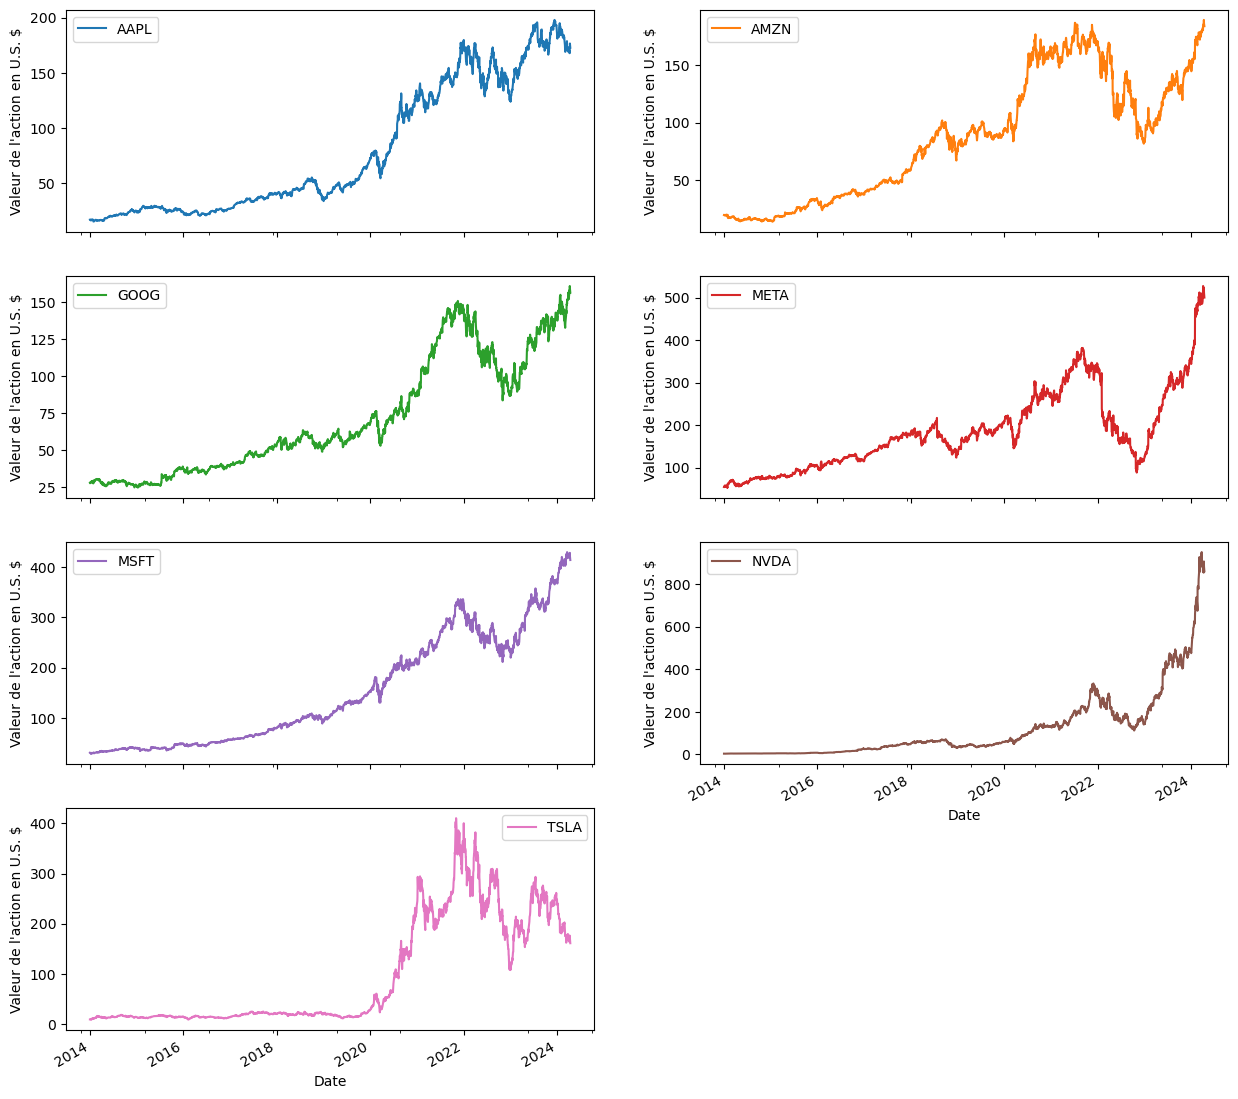

In [2]:
today_date = str(date.today())
share_names = ["AAPL", "NVDA", "TSLA", "AMZN", "META", "MSFT", "GOOG"]
df = yf.download(share_names, start = '2014-01-01', end = today_date)
df['Adj Close'].plot(subplots = True, layout = (4, 2), xlabel = 'Date', ylabel = "Valeur de l'action en U.S. $", figsize = (15, 15))

### Function
    This function named 'information' displays : 
        1) The returns 
        2) The mean
        3) The standard deviation
        4) The sharp ratio
        5) The skew
        6) The kurtosis

In [3]:
def information(nom):
    returnsinpct = df['Adj Close'][nom].pct_change().fillna(0)
    returnsmoy = returnsinpct.mean()*252
    returnsstd = returnsinpct.std()*np.sqrt(252)
    skew = returnsinpct.skew()
    kurtosis = returnsinpct.kurt()
    
    titles = ['Current Value in US $', 'Annualized Average Return', 'Annualized Standard Deviation of Returns', "Sharp Ratio", "Skew", "Kutosis"]
    current_value = df['Adj Close'][nom][-1]
    valeurs = [current_value, returnsmoy, returnsstd, returnsmoy/returnsstd, skew, kurtosis]
    df1 = pd.DataFrame({'Value' : valeurs} )
    df1.index = titles
    
    
    
    fig,axs = plt.subplots(1, 2, figsize = (15, 10))
    axs[0].plot(df['Adj Close'][nom])
    axs[1].plot(returnsinpct)
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel("Cours de l'action en US $")
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Rendement journalier en %')
    
    
    return df1, axs

,Value
Current Value in US $,860.010010
Annualized Average Return,0.636735
Annualized Standard Deviation of Returns,0.464745
Sharp Ratio,1.370072
Skew,0.716737
Kutosis,9.743998


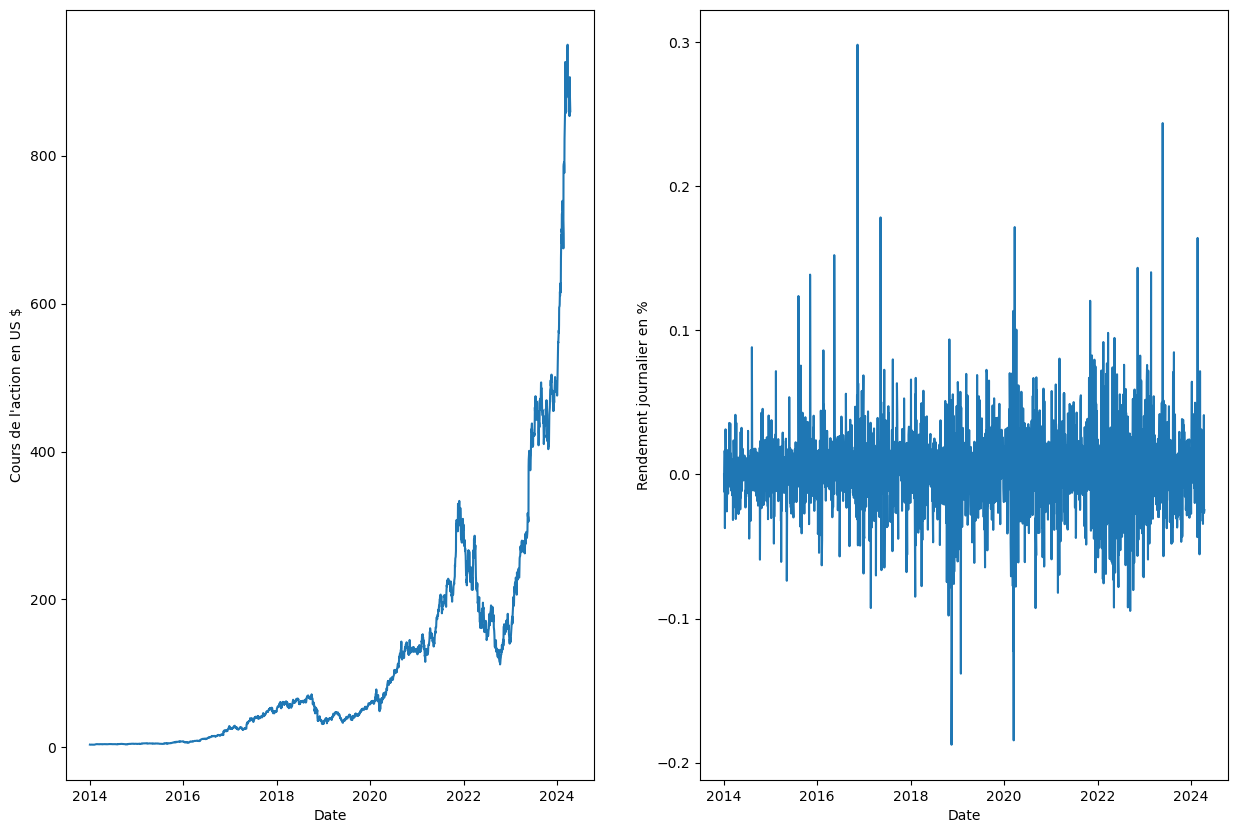

In [4]:
basic_metrics = information('NVDA')[0]
basic_metrics

### Functions
    1) Return's mean
    2) Return'Standard Deviation
    3) Skew
    4) Kurtosis
    5) Max DrawDown & Normalized Max Drawdown
    6) Return's correlation 
    7) VaR
    8) CVaR
    9) Concatenation of all those metrics

In [5]:
def mean_return(returnsinpct):
    returnsmean = returnsinpct.mean()*252
    returns_mean = returnsmean.to_frame(name = 'Annualized Average Return')
    
    return returns_mean

def std_return(returnsinpct):
    returnsstd = returnsinpct.std()*np.sqrt(252)
    returns_std = returnsstd.to_frame(name = 'Annualized Standard Deviation of Returns')
    
    return returns_std

def skew(returnsinpct):
    returnsskew = returnsinpct.skew()
    returns_skew = returnsskew.to_frame(name = 'Skew')
    
    return returns_skew

def kurtosis(returnsinpct):
    returnskurtosis = returnsinpct.kurt()
    returns_kurtosis = returnskurtosis.to_frame(name = 'Kurtosis')
    
    return returns_kurtosis

def max_draw_down(returnsinpct):
    max_dd = returnsinpct.min()
    max_dd_df = max_dd.to_frame(name='Max Draw Down')
    
    return max_dd_df

def std_max_draw_down(returnsinpct):
    std_max_dd = (returnsinpct.min()/(returnsinpct.std()*np.sqrt(252)))
    std_max_dd_df = std_max_dd.to_frame(name='Standardized Max Draw Down')

    return std_max_dd_df

def val_at_risk(df, confidence):
    a = []

    for nom in share_names : 
        valeurs = df['Adj Close'][nom].pct_change().fillna(0)
        a.append(valeurs.sort_values(ascending = True, inplace = False, ignore_index = True))
    
    sorted_returns = pd.DataFrame(a)
    
    position = int((1-confidence)*sorted_returns.shape[1])
    
    value_at_risk = sorted_returns[:][position].to_frame(name = 'Value at Risk')
    
    return value_at_risk

def conditional_val_at_risk(df, confidence):
    a = []
    
    for nom in share_names:
        valeurs = df['Adj Close'][nom].pct_change().fillna(0)
        a.append(valeurs.sort_values(ascending = True, inplace = False, ignore_index = True))
    
    
    sorted_returns = pd.DataFrame(a)
    
    position = int((1-confidence)*sorted_returns.shape[1])
    
    c_value_at_risk = sorted_returns.iloc[ : , : position].mean(axis=1).to_frame(name = 'Expected Shortfall (CVaR)')
    
    return c_value_at_risk

def correlation(returnsinpct):
    corr_matrix = returnsinpct.corr()
    
    return corr_matrix

def concatenation(returnsinpct, df, confidence_level):
    returnsmean = mean_return(returnsinpct)
    returnsstd = std_return(returnsinpct)
    returnsskew = skew(returnsinpct)
    returnskurtosis = kurtosis(returnsinpct)
    maxdd = max_draw_down(returnsinpct)
    stdmaxdd = std_max_draw_down(returnsinpct)
    var = val_at_risk(df, confidence_level)
    cvar = conditional_val_at_risk(df, confidence_level)
    
    
    total = pd.concat([returnsmean, returnsstd, returnsskew, returnskurtosis, maxdd, stdmaxdd, var, cvar], axis = 1)
    
    return total

In [6]:
concatenation(df['Adj Close'].pct_change().fillna(0), df, 0.95)

,Annualized Average Return,Annualized Standard Deviation of Returns,Skew,Kurtosis,Max Draw Down,Standardized Max Draw Down,Value at Risk,Expected Shortfall (CVaR)
AAPL,0.263969,0.282173,-0.027149,5.547551,-0.128647,-0.455915,-0.026680,-0.040850
AMZN,0.270689,0.329812,0.263852,6.419935,-0.140494,-0.425983,-0.030842,-0.047310
GOOG,0.207354,0.279180,0.223152,6.774843,-0.111008,-0.397623,-0.026470,-0.040320
META,0.287389,0.376978,-0.222361,21.091425,-0.263901,-0.700044,-0.033462,-0.052858
MSFT,0.287746,0.268707,0.106832,7.893846,-0.147390,-0.548516,-0.026134,-0.038197
NVDA,0.636735,0.464745,0.716737,9.743998,-0.187558,-0.403573,-0.042457,-0.062332
TSLA,0.424310,0.554553,0.204624,4.392226,-0.210628,-0.379816,-0.050881,-0.077913


### Functions on the correlation
    1) It returns the correlation matrix of the stocks in "share_names" depending on the frequency
    2) It returns the heatmap associated to the correlation matrix given

In [7]:
def compute_correlation_matrix(df, frequency = 'D'):
    data = df['Adj Close'].resample(frequency).last()
    returns = data.pct_change()
    corr_matrix = returns.corr()
    
    return corr_matrix

def correlation_matrix(df, frequency = 'D'):
    data = df['Adj Close'].resample(frequency).last()
    returns = data.pct_change()
    corr_matrix = returns.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype= bool))
    heatmap = sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, mask = mask, cmap='RdYlGn')
    heatmap.set_title("Daily's Returns Correlation Matrix")
        
    if frequency == 'W':
        heatmap.set_title("Weekly's Returns Correlation Matrix")
    if frequency == 'M':
        heatmap.set_title("Monthly's Returns Correlation Matrix")
    if frequency == 'Y':
        heatmap.set_title("Yearly's Returns Correlation Matrix")
        
    return heatmap

In [8]:
compute_correlation_matrix(df, frequency = 'M')

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,1.000000,0.525822,0.459837,0.373695,0.577224,0.530833,0.523527
AMZN,0.525822,1.000000,0.639233,0.471260,0.595527,0.539577,0.428954
GOOG,0.459837,0.639233,1.000000,0.497357,0.628673,0.502555,0.358017
META,0.373695,0.471260,0.497357,1.000000,0.439893,0.415978,0.284852
MSFT,0.577224,0.595527,0.628673,0.439893,1.000000,0.563118,0.371353
NVDA,0.530833,0.539577,0.502555,0.415978,0.563118,1.000000,0.359499
TSLA,0.523527,0.428954,0.358017,0.284852,0.371353,0.359499,1.000000


<Axes: title={'center': "Monthly's Returns Correlation Matrix"}, xlabel='Ticker', ylabel='Ticker'>

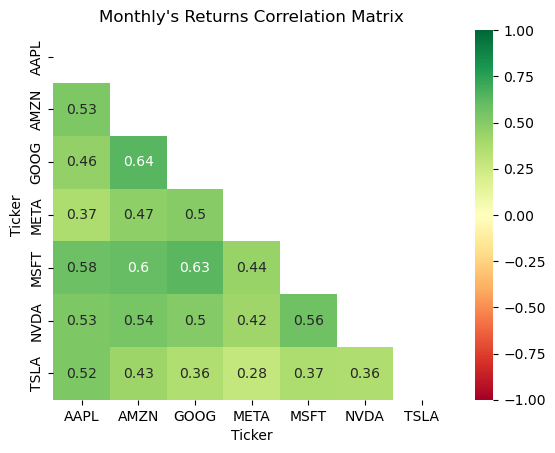

In [9]:
correlation_matrix(df, frequency = 'M')

    3) "display_correlation_matrix()" returns 4 heatmaps : 
        1 - Daily's Returns Correlation Heatmap
        2 - Weekly's Returns Correlation Heatmap
        3 - Monthly's Returns Correlation Heatmap
        4 - Yearly's Returns Correlation Heatmap

In [10]:
def display_correlation_matrix(df):
    corr_matrix_day = compute_correlation_matrix(df, frequency = 'D')
    corr_matrix_week = compute_correlation_matrix(df, frequency = 'W')
    corr_matrix_month = compute_correlation_matrix(df, frequency = 'M')
    corr_matrix_year = compute_correlation_matrix(df, frequency = 'Y')
    
    mask = np.triu(np.ones_like(corr_matrix_day, dtype= bool))
    
    fig,axs = plt.subplots(2, 2, figsize = (15, 10))
    
    ax = axs[0, 0]
    sns.heatmap(corr_matrix_day, vmin = -1, vmax = 1, annot = True, mask = mask, cmap='RdYlGn', ax = ax)
    ax.set_title("Daily's Returns Correlation Matrix")
    
    ax = axs[0, 1]
    sns.heatmap(corr_matrix_week, vmin = -1, vmax = 1, annot = True, mask = mask, cmap='RdYlGn', ax = ax)
    ax.set_title("Weekly's Returns Correlation Matrix")
    
    ax = axs[1, 0]
    sns.heatmap(corr_matrix_month, vmin = -1, vmax = 1, annot = True, mask = mask, cmap='RdYlGn', ax = ax)
    ax.set_title("Monthly's Returns Correlation Matrix")
    
    ax = axs[1, 1]
    sns.heatmap(corr_matrix_year, vmin = -1, vmax = 1, annot = True, mask = mask, cmap='RdYlGn', ax = ax)
    ax.set_title("Yearly's Returns Correlation Matrix")
                
    return axs

array([[<Axes: title={'center': "Daily's Returns Correlation Matrix"}, xlabel='Ticker', ylabel='Ticker'>,
        <Axes: title={'center': "Weekly's Returns Correlation Matrix"}, xlabel='Ticker', ylabel='Ticker'>],
       [<Axes: title={'center': "Monthly's Returns Correlation Matrix"}, xlabel='Ticker', ylabel='Ticker'>,
        <Axes: title={'center': "Yearly's Returns Correlation Matrix"}, xlabel='Ticker', ylabel='Ticker'>]],
      dtype=object)

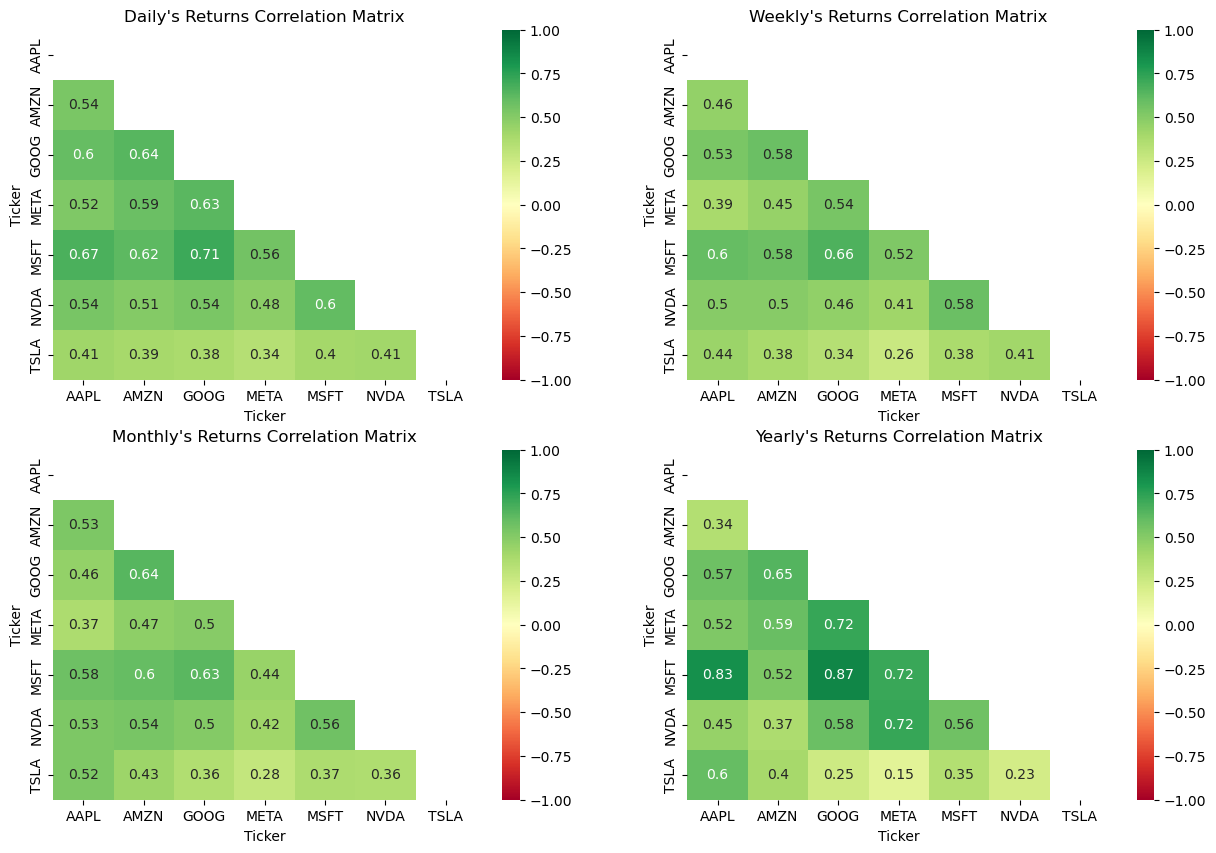

In [11]:
display_correlation_matrix(df)

    4) Given an n-share portfolio, the "rolling_corr()" function returns the following number of possible correlations:
$$
\frac{n \cdot (n-1)}{2}
$$


array([[<Axes: title={'center': 'Correlation value between AAPL and NVDA'}, xlabel='Date'>,
        <Axes: title={'center': 'Correlation value between AAPL and TSLA'}, xlabel='Date'>],
       [<Axes: title={'center': 'Correlation value between AAPL and AMZN'}, xlabel='Date'>,
        <Axes: title={'center': 'Correlation value between AAPL and META'}, xlabel='Date'>],
       [<Axes: title={'center': 'Correlation value between AAPL and MSFT'}, xlabel='Date'>,
        <Axes: title={'center': 'Correlation value between AAPL and GOOG'}, xlabel='Date'>],
       [<Axes: title={'center': 'Correlation value between NVDA and TSLA'}, xlabel='Date'>,
        <Axes: title={'center': 'Correlation value between NVDA and AMZN'}, xlabel='Date'>],
       [<Axes: title={'center': 'Correlation value between NVDA and META'}, xlabel='Date'>,
        <Axes: title={'center': 'Correlation value between NVDA and MSFT'}, xlabel='Date'>],
       [<Axes: title={'center': 'Correlation value between NVDA and GOOG'},

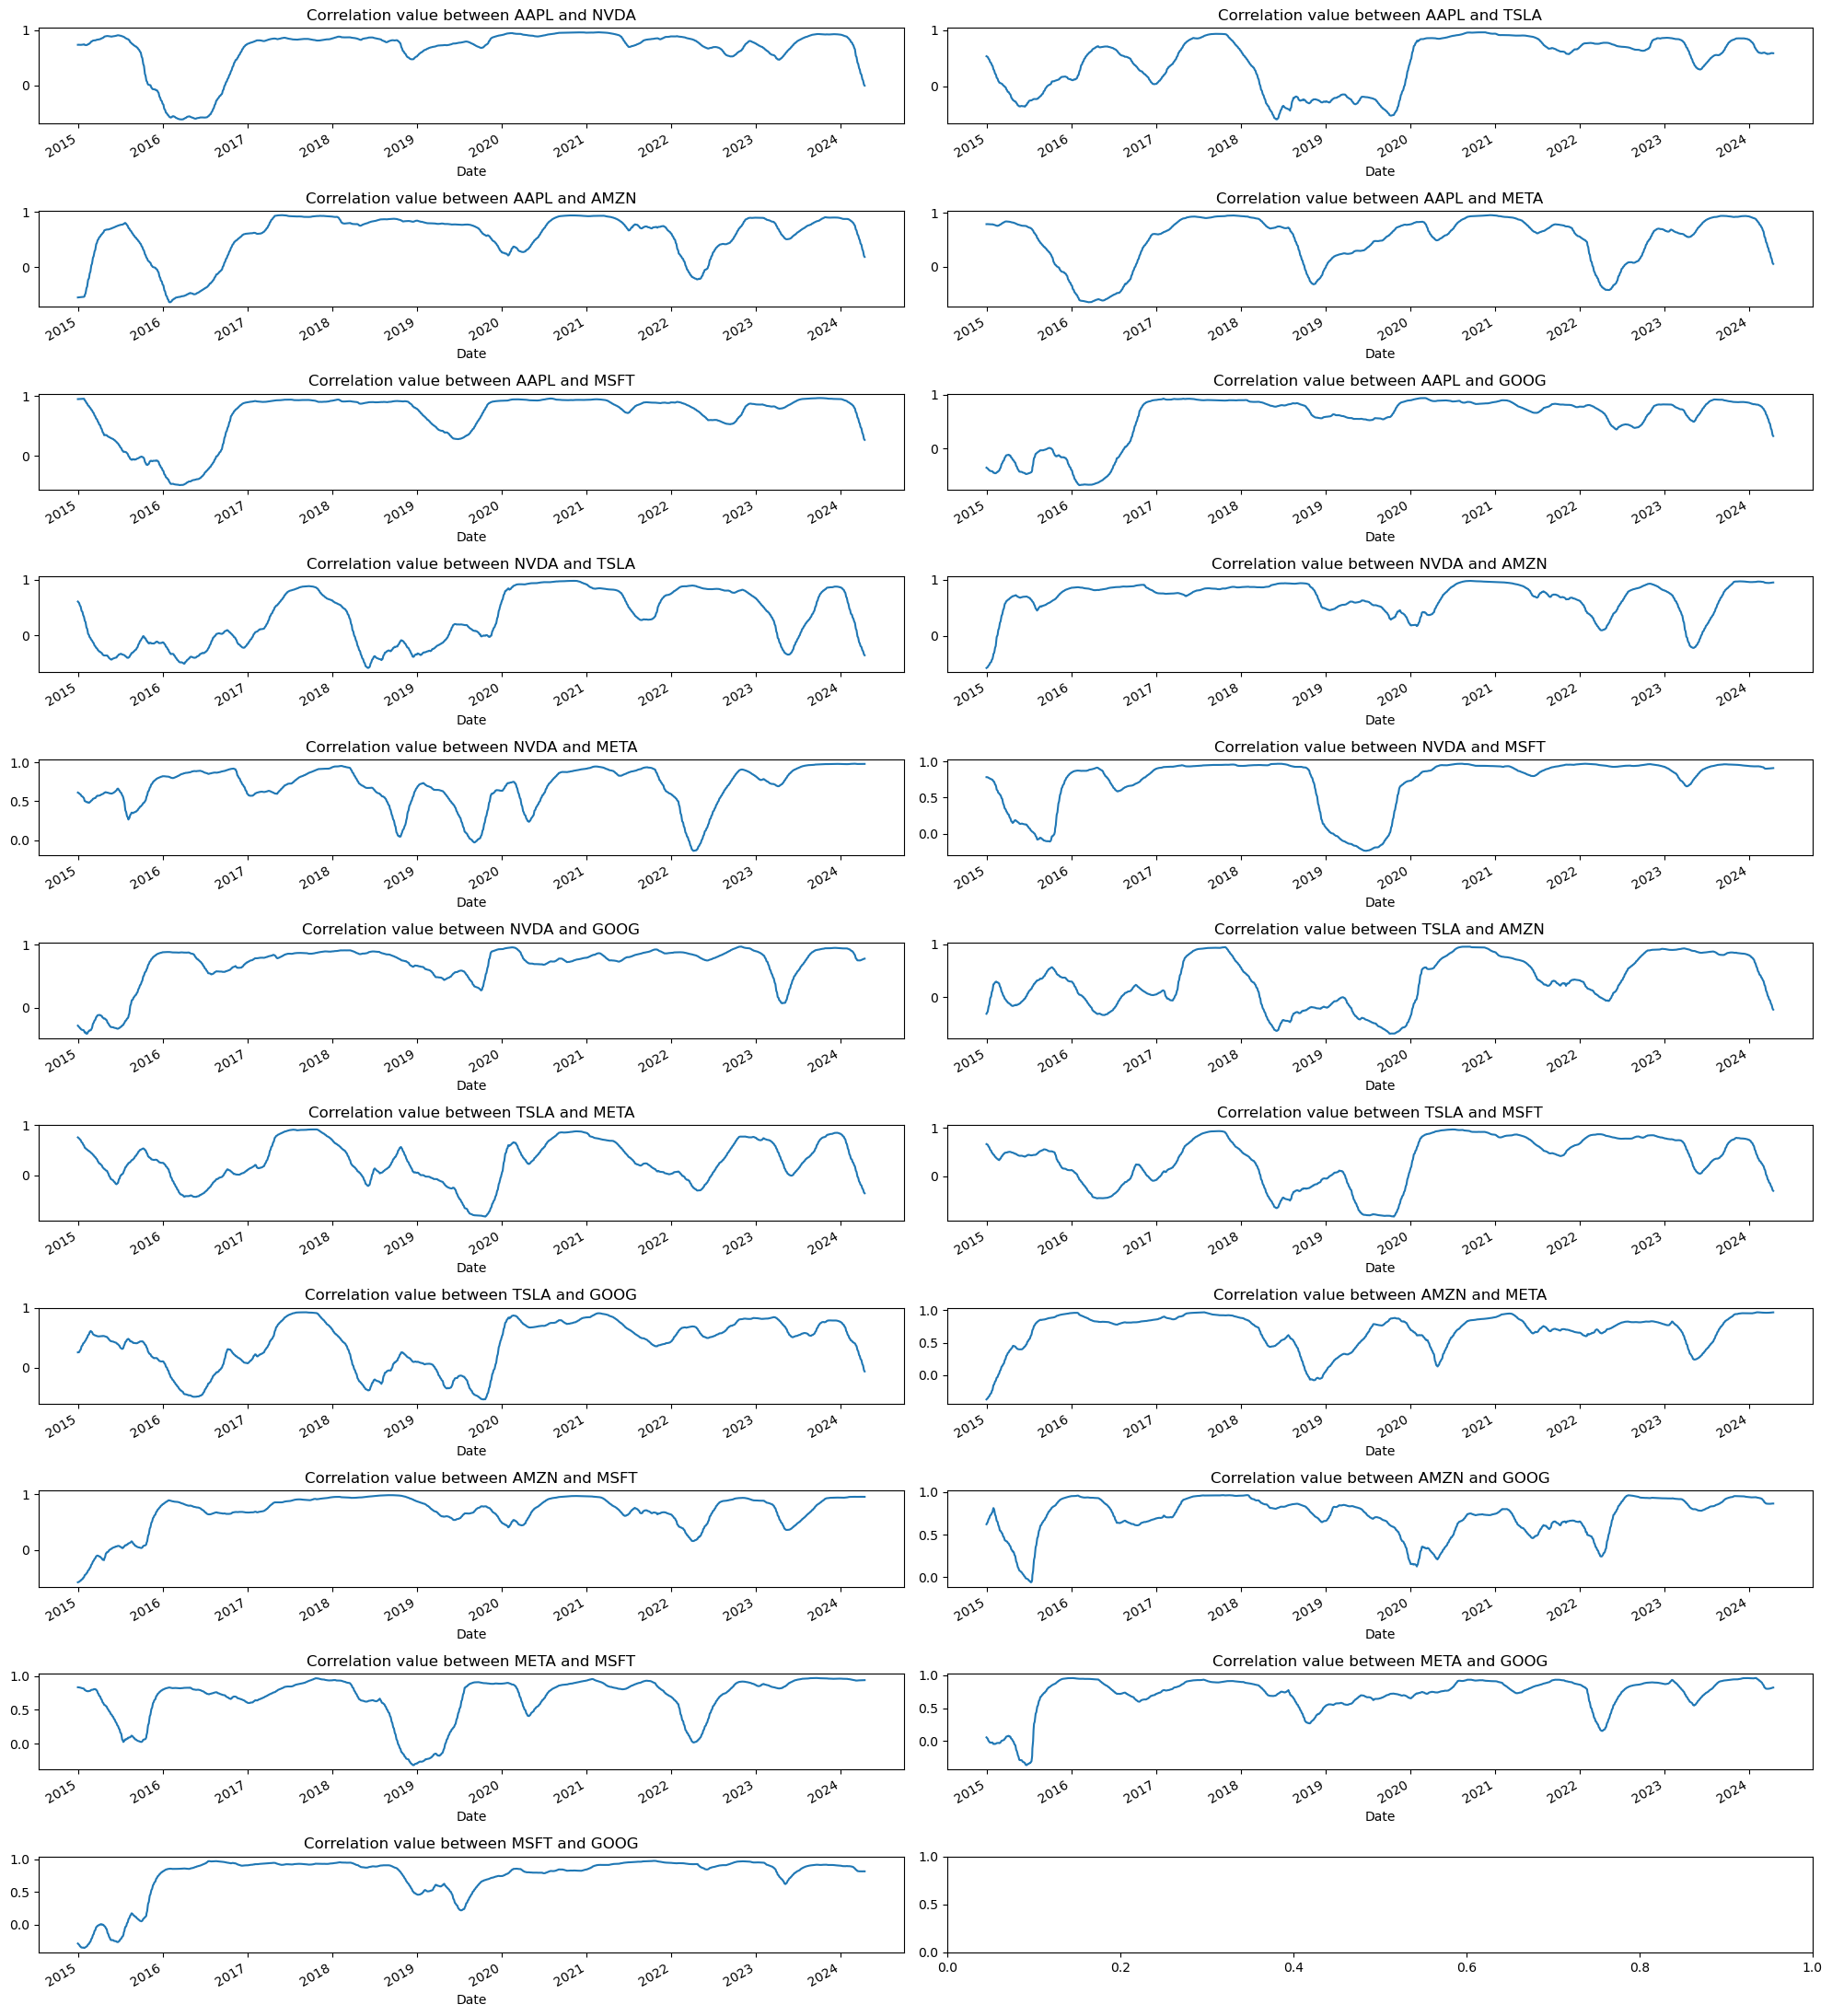

In [12]:
def rolling_corr(df, frequency = 252):
    stock_nb = len(share_names)
    graph_nb = (stock_nb*(stock_nb - 1))/2
    
    """
    Calculates the number of rows required to display the correlations for a given number of stocks. 
    If half the number of stocks is an odd number, then add an additional row. Otherwise, no extra row is needed.
    """
    
    if graph_nb/2 % 1 != 0 : 
        row_nb = int(graph_nb/2) + 1
    else : 
        row_nb = int(graph_nb/2)
    
    
    "Construction of the rolling correlation matrix"
    
    correlation = df['Adj Close'].rolling(frequency).corr(pairwise = True).dropna()
    swaped_corr = correlation.swaplevel(0, 1)
    sorted_swaped_corr = swaped_corr.sort_values('Ticker') 

    """Sets up the necessary number of graph panels to plot all the possible correlations within the given dataset, 
    ensuring that each pairwise correlation will have its dedicated subplot for detailed analysis."""
    
    fig,axs = plt.subplots(row_nb, 2, figsize = (20, 22))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    ax_index = 0
    
    
    "Plots the correlations in the graph panels dedicated"
    
    for i in range(stock_nb):
        
        for j in range(i+1, stock_nb):
            ax = axs[ax_index // 2][ax_index % 2]
            title = "Correlation value between " + str(share_names[i]) + " and " +  str(share_names[j])
            ax.set_title(title)
            correl_matrix = sorted_swaped_corr.xs(share_names[i]).drop(share_names[i], inplace = False, axis = 1)
            correl_matrix[share_names[j]].plot(ax = ax)
            ax_index = ax_index + 1
            
    plt.tight_layout()
    
    return axs
rolling_corr(df, frequency = 252)